In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/CS247/Models')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### The goal of this notebook is to explore and preprocess the beer review data
##### 1. load data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS247/Data/beer_reviews.csv')

##### 2. drop NaN values

In [ ]:
data[data['review_profilename'].isna()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
8869,395,Bluegrass Brewing Co. - East St. Matthew's,1205005717,4.0,4.0,3.5,NaN,American Double / Imperial Stout,3.0,3.5,Jefferson's Reserve Bourbon Barrel Stout,8.5,29687
22125,1199,Founders Brewing Company,1231726538,4.0,4.5,4.5,NaN,American Double / Imperial Stout,4.0,4.5,Founders Breakfast Stout,8.3,11757
31822,1199,Founders Brewing Company,1246501387,4.0,4.0,4.0,NaN,American IPA,4.0,4.5,Founders Centennial IPA,7.2,5441
33500,1199,Founders Brewing Company,1238871081,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
33678,1199,Founders Brewing Company,1227224257,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573069,1478,Grand Ridge Brewing Co.,1098619135,3.5,3.0,3.5,NaN,English Pale Ale,3.5,3.0,Grand Ridge Gippsland Gold,4.9,3898
1573134,1478,Grand Ridge Brewing Co.,1099734817,3.5,3.5,4.5,NaN,American Blonde Ale,3.5,3.0,Grand Ridge Yarra Valley Gold,4.9,3903
1573157,1478,Grand Ridge Brewing Co.,1161397360,3.0,3.5,2.0,NaN,Scotch Ale / Wee Heavy,3.0,3.0,Grand Ridge Moonshine,8.5,3900
1580683,429,Alaskan Brewing Co.,1238038506,2.5,3.5,3.0,NaN,Altbier,3.0,2.5,Alaskan Amber,5.3,1309


In [ ]:
data[data['beer_beerid'].isna()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


In [ ]:
data[data['review_overall'].isna()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


In [ ]:
### drop rows with NaN profile name
data=data.dropna(subset=['review_profilename'], axis=0).reset_index(drop=True)

In [ ]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


##### 3. exploring the data

In [ ]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
data[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']].describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.586266e+06,1.586266e+06,1.586266e+06,1.586266e+06,1.586266e+06,1.518493e+06
mean,3.815628e+00,3.735686e+00,3.841671e+00,3.743753e+00,3.792921e+00,7.042479e+00
std,7.205948e-01,6.975674e-01,6.160650e-01,6.821753e-01,7.319122e-01,2.322562e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01


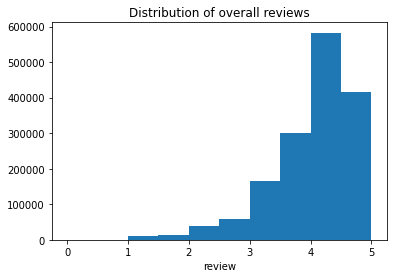

In [ ]:
### Overall review score distribution
plt.hist(data['review_overall'], bins = 10)
plt.title('Distribution of overall reviews')
plt.xlabel('review')
plt.show()

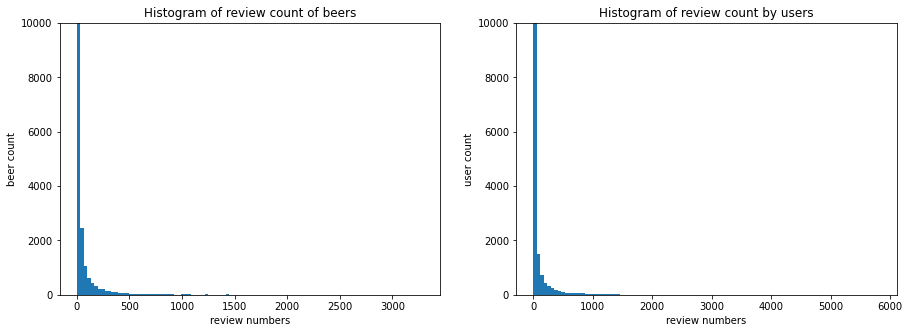

In [ ]:
### review count by beer
review_ct_beer = data.groupby('beer_beerid').size().reset_index(name='count')
review_ct_beer.sort_values(by='count', ascending=False, inplace=True)

### review count by user
review_ct_user = data.groupby('review_profilename').size().reset_index(name='count')
review_ct_user.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.ylim((0,10000))
plt.hist(review_ct_beer['count'], bins=100)
plt.xlabel('review numbers')
plt.ylabel('beer count')
plt.title('Histogram of review count of beers')
plt.subplot(122)
plt.ylim((0,10000))
plt.hist(review_ct_user['count'], bins=100)
plt.xlabel('review numbers')
plt.ylabel('user count')
plt.title('Histogram of review count by users')

plt.show()

Most users gives around 0 reviews and most beers receive around 0 reviews

In [ ]:
print(data.columns)

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')


In [ ]:
unique_types = data['beer_style'].unique()
print(len(unique_types))
print(unique_types)
print(sum('Ale' in s for s in unique_types))
print(sum('Stout' in s for s in unique_types))
print(sum('IPA' in s for s in unique_types))
print(sum('Lager' in s for s in unique_types))
print(sum('Porter' in s for s in unique_types))

104
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adjunct Lager' 'American Blonde Ale' 'Euro Pale Lager'
 'English Brown Ale' 'Scotch Ale / Wee Heavy' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Irish Dry Stout' 'American Barleywine'
 'Belgian Strong Pale Ale' 'Doppelbock' 'Maibock / Helles Bock'
 'Pumpkin Ale' 'Dortmunder / Export Lager' 'Euro Strong Lager'
 'Euro Dark Lager' 'Low Alcohol Beer' 'Weizenbock'
 'Extra Special / Strong Bitter (ESB)' 'Bock'
 'English India Pale Ale (IPA)' 'Altbier' 'Kölsch' 'Munich Dunkel Lager'
 'Rye Beer' 'American Pale Whe

In [ ]:
unique_users = data['review_profilename'].unique()
unique_beers = data['beer_beerid'].unique()
print("There are {} unique users and {} unique beers in the dataset.".format(len(unique_users), len(unique_beers)))
print("There are {:.2f}% missing entries in the sparse user-item matrix.".format(100*(1-len(data)/(len(unique_users) * len(unique_beers)))))

There are 33387 unique users and 66051 unique beers in the dataset.
There are 99.93% missing entries in the sparse user-item matrix.


In [ ]:
import json

### build user profilename to id mapping
user_id_mapping = data[['review_profilename']].drop_duplicates().reset_index(drop=True).reset_index().rename(columns={'index':'id'})

### build beer to id map
beer_id_mapping = data[['beer_name', 'beer_beerid']].drop_duplicates()

user_id_mapping.to_pickle('/content/drive/MyDrive/CS247/Data/user_id_mapping.pkl')
beer_id_mapping.to_pickle('/content/drive/MyDrive/CS247/Data/beer_id_mapping.pkl')

The goal of our project is to predict those 99.93% missing entries.

 ###### Average overall review score vs abv

In [ ]:
score_by_beer = data[['review_overall', 'beer_beerid']].groupby(['beer_beerid']).mean().reset_index()
abv_by_beer = data[['beer_abv', 'beer_beerid']].groupby(['beer_beerid']).mean().reset_index()
score_vs_abv = pd.merge(score_by_beer, abv_by_beer, how='inner', on='beer_beerid').dropna()

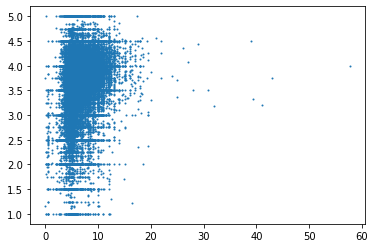

In [ ]:
plt.scatter(score_vs_abv['beer_abv'], score_vs_abv['review_overall'], s=1)

This does not look helpful

##### Training Test Split

Split the training test set by the following method:

1. group the data by user
2. for each user, group the data by review timestamp
3. randomly sample 1/5 reviews for each user as test set, and use the rest of the data as the training set

In [ ]:
test_size = 1/5
train_idx = []
test_idx = []
user_ct = 0

## we only want to use users with 5 or more ratings as the split ratio is 1/5
## if a user gives less than 5 ratings, then predicting the ratings of the user might be considered as a cold start problem
## if we have enough time, we canm try to resolve the cold start problem
valid_users = list(review_ct_user[review_ct_user['count'] >= 5]['review_profilename'])
cold_start_users = list(review_ct_user[review_ct_user['count'] < 5]['review_profilename'])

for user in valid_users:
  ## shuffle user_data
  user_data = data[data['review_profilename']==user].sample(frac=1)
  test_split_idx = int(test_size*len(user_data))
  test_idx = test_idx + list(user_data[0:test_split_idx].index.values)
  train_idx = train_idx + list(user_data[test_split_idx:].index.values)
  user_ct = user_ct+1
  if user_ct % 1000 == 0:
    print("finished splitting for {} users".format(user_ct))

finished splitting for 1000 users
finished splitting for 2000 users
finished splitting for 3000 users
finished splitting for 4000 users
finished splitting for 5000 users
finished splitting for 6000 users
finished splitting for 7000 users
finished splitting for 8000 users
finished splitting for 9000 users
finished splitting for 10000 users
finished splitting for 11000 users
finished splitting for 12000 users
finished splitting for 13000 users
finished splitting for 14000 users


In [ ]:
### save training set and test set as well as cold start dataset to pickle files
training_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]
cold_start_data = data[data['review_profilename'].isin(cold_start_users)]

training_data.to_pickle('/content/drive/MyDrive/CS247/Data/training_data.pkl')
test_data.to_pickle('/content/drive/MyDrive/CS247/Data/test_data.pkl')
cold_start_data.to_pickle('/content/drive/MyDrive/CS247/Data/cold_start_data.pkl')